This is a supervised classification problem; the dependent variable is binary, 0 (for failure) and 1 (for success). As such, we will consider the following classification techniques:
* X Naive-Bays
* X logistic regression
* X KNN
* X SVM
* X kernel SVM
* X decision tree classification
* X random forest classification

Validation curves and learning curves will be considered when picking the best model for the project.

Optional:
* XGBoost
* Reduce variables (eg PCA, LDA)
* Optimize parameters (eg grid_search)
* Look into SGD Classifier

In [2]:
#-----------------------------------------
# USER INPUTS


In [6]:
#-----------------------------------------
# IMPORT LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import dill

pd.options.display.max_columns = None # Shows all columns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [19]:
#-----------------------------------------
# DUMP/LOAD SESSION

# ---- DUMP ----
#dill.dump_session('./04 Working - Models.db')

# ---- LOAD ----
#dill.load_session('./04 Working - Models.db')

In [3]:
#-----------------------------------------
# IMPORT DATAFRAME

df = pd.read_csv('data/df02.csv', sep=',', na_filter=False, index_col=0, 
                 parse_dates=['launched_at'])

# Checks
if (df.isnull().sum().sum() != 0):
    print('*** WARNING: Null values introduced with read_csv ***')
if (df.isna().sum().sum() != 0):
    print('*** WARNING: NA values introduced with read_csv ***')
if (df=='').sum().sum() != 0:
    print('*** WARNING: Empty string (\'\') values introduced with read_csv ***')

In [8]:
df.isnull().sum().sum()

0

In [9]:
df.isna().sum().sum()

0

In [13]:
(df == '').sum().sum()

0

In [14]:
info_variables = ['id','launched_at','category','country']

In [16]:
X = df.drop(columns=info_variables).drop(columns='launch_state')
y = df['launch_state']

In [20]:
#-----------------------------------------
# TRAIN/TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=101)

In [26]:
#-----------------------------------------
# FEATURE SCALING

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
#==============================================================================
#
# NAIVE BAYES
#
#==============================================================================

In [27]:
#-----------------------------------------
# FIT MODEL

start_clock = time.clock()

# Naive-Bayes
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

end_clock = time.clock()

clock_fit_nb = end_clock - start_clock
print('Runtime, fit: ', round(clock_fit_nb, 2), ' sec', sep='')

Runtime, fit: 0.47 sec


In [28]:
#-----------------------------------------
# PREDICT TEST RESULTS

start_clock = time.clock()

y_pred_nb = classifier_nb.predict(X_test)

end_clock = time.clock()

clock_predict_nb = end_clock - start_clock
print('Runtime, predict: ', round(clock_predict_nb, 2), ' sec', sep='')

Runtime, predict: 0.18 sec


In [29]:
#-----------------------------------------
# EVALUATE MODEL

# Confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Classification report
cr_nb = classification_report(y_test, y_pred_nb)

print(cm_nb)
print("\n")
print(cr_nb)

[[ 2077 12921]
 [  474 19890]]


             precision    recall  f1-score   support

          0       0.81      0.14      0.24     14998
          1       0.61      0.98      0.75     20364

avg / total       0.69      0.62      0.53     35362



In [66]:
acc_nb = cm_nb.diagonal().sum() / cm_nb.sum()
acc_nb

0.6212035518353034

In [32]:
#-----------------------------------------
# APPLY K-FOLD CROSS VALIDATION

start_clock = time.clock()

accuracies_nb = cross_val_score(
    estimator=classifier_nb, X=X_train, y=y_train,
    cv=10)

end_clock = time.clock()

clock_10FCV_nb = end_clock - start_clock
print('Runtime, 10-fold CV: ', round(clock_10FCV_nb, 2), ' sec', sep='')

Runtime, 10-fold CV: 7.64 sec


In [33]:
print("Accuracies:")
print(accuracies_nb)
print('\n')
print("RESULTS:")
print(f"  - Mean accuracy: {round(accuracies_nb.mean(), 2)*100}%")
print(f"  - Accuracy std dev: {round(accuracies_nb.std(), 2)*100}%")

Accuracies:
[0.90017909 0.93185032 0.94391554 0.60401546 0.63860873 0.94269017
 0.63700632 0.63650075 0.61959084 0.60384652]


RESULTS:
  - Mean accuracy: 75.0%
  - Accuracy std dev: 15.0%


In [42]:
df_results_nb = pd.DataFrame([{
    'model':'Naive Bayes', 
    'time_fit':clock_fit_nb, 'time_predict':clock_predict_nb,
    'time_10_fold_CV':clock_10FCV_nb,
    'accuracy':acc_nb, 'acc_10_fold':accuracies_nb.mean()}])

In [44]:
df_results_nb = df_results_nb[['model','time_fit','time_predict','time_10_fold_CV','accuracy','acc_10_fold']]

In [46]:
df_results = df_results_nb

In [47]:
df_results

,model,time_fit,time_predict,time_10_fold_CV,accuracy,acc_10_fold
0,Naive Bayes,0.472809,0.183608,7.644587,0.621204,0.74582


In [48]:
#==============================================================================
#
# LOGISTIC REGRESSION
#
#==============================================================================

In [49]:
#-----------------------------------------
# FIT MODEL

start_clock = time.clock()

# Logistic regression
classifier_LogReg = LogisticRegression(random_state=101)
classifier_LogReg.fit(X_train, y_train)

end_clock = time.clock()

clock_fit_LogReg = end_clock - start_clock
print('Runtime, fit: ', round(clock_fit_LogReg, 2), ' sec', sep='')

Runtime, fit: 20.99 sec


In [50]:
#-----------------------------------------
# PREDICT TEST RESULTS

start_clock = time.clock()

y_pred_LogReg = classifier_LogReg.predict(X_test)

end_clock = time.clock()

clock_predict_LogReg = end_clock - start_clock
print('Runtime, predict: ', round(clock_predict_LogReg, 2), ' sec', sep='')

Runtime, predict: 0.01 sec


In [51]:
#-----------------------------------------
# EVALUATE MODEL

# Confusion matrix
cm_LogReg = confusion_matrix(y_test, y_pred_LogReg)

# Classification report
cr_LogReg = classification_report(y_test, y_pred_LogReg)

print(cm_LogReg)
print("\n")
print(cr_LogReg)

[[12004  2994]
 [ 2765 17599]]


             precision    recall  f1-score   support

          0       0.81      0.80      0.81     14998
          1       0.85      0.86      0.86     20364

avg / total       0.84      0.84      0.84     35362



In [52]:
acc_LogReg = cm_LogReg.diagonal().sum() / cm_LogReg.sum()

In [53]:
acc_LogReg

0.8371415643911544

In [54]:
#-----------------------------------------
# APPLY K-FOLD CROSS VALIDATION

start_clock = time.clock()

accuracies_LogReg = cross_val_score(
    estimator=classifier_LogReg, X=X_train, y=y_train,
    cv=10)

end_clock = time.clock()

clock_10FCV_LogReg = end_clock - start_clock
print('Runtime, 10-fold CV: ', round(clock_10FCV_LogReg, 2), ' sec', sep='')

Runtime, 10-fold CV: 205.52 sec


In [55]:
print("Accuracies:")
print(accuracies_LogReg)
print('\n')
print("RESULTS:")
print(f"  - Mean accuracy: {round(accuracies_LogReg.mean(), 2)*100}%")
print(f"  - Accuracy std dev: {round(accuracies_LogReg.std(), 2)*100}%")

Accuracies:
[0.82769347 0.85964747 0.85785654 0.85144688 0.85474597 0.84220944
 0.8476765  0.87368024 0.86480626 0.82888658]


RESULTS:
  - Mean accuracy: 85.0%
  - Accuracy std dev: 1.0%


In [57]:
df_results_LogReg = pd.DataFrame([{
    'model':'Logistic Regression', 
    'time_fit':clock_fit_LogReg, 'time_predict':clock_predict_LogReg,
    'time_10_fold_CV':clock_10FCV_LogReg,
    'accuracy':acc_LogReg, 'acc_10_fold':accuracies_LogReg.mean()}])
df_results_LogReg = df_results_LogReg[['model','time_fit','time_predict','time_10_fold_CV','accuracy','acc_10_fold']]

In [59]:
df_results = pd.DataFrame.append(df_results, df_results_LogReg).reset_index(drop=True)

In [60]:
df_results

,model,time_fit,time_predict,time_10_fold_CV,accuracy,acc_10_fold
0,Naive Bayes,0.472809,0.183608,7.644587,0.621204,0.745820
1,Logistic Regression,20.989989,0.014490,205.522094,0.837142,0.850865


In [ ]:
#==============================================================================
#
# K NEAREST NEIGHBORS
#
#==============================================================================

In [61]:
#-----------------------------------------
# FIT MODEL

start_clock = time.clock()

# KNN
classifier_knn = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
classifier_knn.fit(X_train, y_train)

end_clock = time.clock()

clock_fit_knn = end_clock - start_clock
print('Runtime, fit: ', round(clock_fit_knn, 2), ' sec', sep='')

Runtime, fit: 43.69 sec


In [62]:
#-----------------------------------------
# PREDICT TEST RESULTS

start_clock = time.clock()

y_pred_knn = classifier_knn.predict(X_test)

end_clock = time.clock()

clock_predict_knn = end_clock - start_clock
print('Runtime, predict: ', round(clock_predict_knn, 2), ' sec', sep='')

Runtime, predict: 931.51 sec


In [63]:
#-----------------------------------------
# EVALUATE MODEL

# Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Classification report
cr_knn = classification_report(y_test, y_pred_knn)

print(cm_knn)
print("\n")
print(cr_knn)

[[13101  1897]
 [ 1300 19064]]


             precision    recall  f1-score   support

          0       0.91      0.87      0.89     14998
          1       0.91      0.94      0.92     20364

avg / total       0.91      0.91      0.91     35362



In [64]:
acc_knn = cm_knn.diagonal().sum() / cm_knn.sum()
acc_knn

In [65]:
#-----------------------------------------
# APPLY K-FOLD CROSS VALIDATION

# 10-fold cross validation time estimate:
print('10-fold CV estimated time: ', 
      round((clock_fit_knn + clock_predict_knn)*10/60/60, 2), 
      ' hours')

10-fold CV estimated time:  2.71  hours


In [66]:
start_clock = time.clock()

accuracies_knn = cross_val_score(
    estimator=classifier_knn, X=X_train, y=y_train,
    cv=10)

end_clock = time.clock()

clock_10FCV_knn = end_clock - start_clock
print('Runtime, 10-fold CV: ', round(clock_10FCV_knn, 2), ' sec', sep='')

Runtime, 10-fold CV: 2974.55 sec


In [67]:
print("Accuracies:")
print(accuracies_knn)
print('\n')
print("RESULTS:")
print(f"  - Mean accuracy: {round(accuracies_knn.mean(), 2)*100}%")
print(f"  - Accuracy std dev: {round(accuracies_knn.std(), 2)*100}%")

Accuracies:
[0.90432652 0.91337544 0.9120558  0.91026487 0.90960505 0.9080969
 0.90460929 0.91185897 0.9154332  0.90732535]


RESULTS:
  - Mean accuracy: 91.0%
  - Accuracy std dev: 0.0%


In [68]:
df_results_knn = pd.DataFrame([{
    'model':'K Nearest Neighbors', 
    'time_fit':clock_fit_knn, 'time_predict':clock_predict_knn,
    'time_10_fold_CV':clock_10FCV_knn,
    'accuracy':acc_knn, 'acc_10_fold':accuracies_knn.mean()}])
df_results_knn = df_results_knn[['model','time_fit','time_predict','time_10_fold_CV','accuracy','acc_10_fold']]

In [69]:
df_results = pd.DataFrame.append(df_results, df_results_knn).reset_index(drop=True)

In [70]:
df_results

,model,time_fit,time_predict,time_10_fold_CV,accuracy,acc_10_fold
0,Naive Bayes,0.472809,0.183608,7.644587,0.621204,0.745820
1,Logistic Regression,20.989989,0.014490,205.522094,0.837142,0.850865
2,K Nearest Neighbors,43.687085,931.513263,2974.550811,0.909592,0.909695


In [10]:
#==============================================================================
#
# SUPPORT VECTOR MACHINE
#
#==============================================================================

In [11]:
#-----------------------------------------
# FIT MODEL

start_clock = time.clock()

# SVM
classifier_svm_linear = SVC(kernel="linear", random_state=101)
classifier_svm_linear.fit(X_train, y_train)

end_clock = time.clock()

clock_fit_svm_linear = end_clock - start_clock
print('Runtime, fit: ', round(clock_fit_svm_linear, 2), ' sec', sep='')

Runtime, fit: 2015.38 sec


In [12]:
#-----------------------------------------
# PREDICT TEST RESULTS

start_clock = time.clock()

y_pred_svm_linear = classifier_svm_linear.predict(X_test)

end_clock = time.clock()

clock_predict_svm_linear = end_clock - start_clock
print('Runtime, predict: ', round(clock_predict_svm_linear, 2), ' sec', sep='')

Runtime, predict: 311.12 sec


In [13]:
#-----------------------------------------
# EVALUATE MODEL

# Confusion matrix
cm_svm_linear = confusion_matrix(y_test, y_pred_svm_linear)

# Classification report
cr_svm_linear = classification_report(y_test, y_pred_svm_linear)

print(cm_svm_linear)
print("\n")
print(cr_svm_linear)

[[13940  1058]
 [ 1155 19209]]


             precision    recall  f1-score   support

          0       0.92      0.93      0.93     14998
          1       0.95      0.94      0.95     20364

avg / total       0.94      0.94      0.94     35362



In [14]:
acc_svm_linear = cm_svm_linear.diagonal().sum() / cm_svm_linear.sum()
acc_svm_linear

0.9374186980374413

In [15]:
#-----------------------------------------
# APPLY K-FOLD CROSS VALIDATION

# 10-fold cross validation time estimate:
print('10-fold CV estimated time: ', 
      round((clock_fit_svm_linear + clock_predict_svm_linear)*10/60/60, 2), 
      ' hours')

10-fold CV estimated time:  6.46  hours


In [ ]:
# *** TIME-INTENSIVE ***
"""start_clock = time.clock()

accuracies_svm = cross_val_score(
    estimator=classifier_svm, X=X_train, y=y_train,
    cv=10)

end_clock = time.clock()

clock_10FCV_svm = end_clock - start_clock
print('Runtime, 10-fold CV: ', round(clock_10FCV_svm, 2), ' sec', sep='')"""

In [16]:
try:
    clock_10FCV_svm_linear
except:
    clock_10FCV_svm_linear = None
    print("No 10-fold CV time to report")

No 10-fold CV time to report


In [17]:
try:
    accuracies_svm_linear
except:
    accuracy_10FCV_mean_svm_linear = None
    print("No K-fold CV accuracies to report")
else:
    accuracy_10FCV_mean_svm_linear = accuracies_svm_linear.mean()
    print("Accuracies:")
    print(accuracies_svm_linear)
    print('\n')
    print("RESULTS:")
    print(f"  - Mean accuracy: {round(accuracies_svm_linear.mean(),4)*100}%")
    print(f"  - Accuracy std dev: {round(accuracies_svm_linear.std(),4)*100}%")

No K-fold CV accuracies to report


In [18]:
df_results_svm_linear = pd.DataFrame([{
    'model':'SVM, Linear', 
    'time_fit':clock_fit_svm_linear, 'time_predict':clock_predict_svm_linear,
    'time_10_fold_CV':clock_10FCV_svm_linear,
    'accuracy':acc_svm_linear, 'acc_10_fold':accuracy_10FCV_mean_svm_linear}])
df_results_svm_linear = df_results_svm_linear[['model','time_fit','time_predict','time_10_fold_CV','accuracy','acc_10_fold']]

In [20]:
df_results = pd.DataFrame.append(df_results, df_results_svm_linear).reset_index(drop=True)

In [21]:
df_results

,model,time_fit,time_predict,time_10_fold_CV,accuracy,acc_10_fold
0,Naive Bayes,0.472809,0.183608,7.64459,0.621204,0.74582
1,Logistic Regression,20.989989,0.014490,205.522,0.837142,0.850865
2,K Nearest Neighbors,43.687085,931.513263,2974.55,0.909592,0.909695
3,"SVM, Kernel RBF",2722.813777,553.268978,None,0.748346,None
4,Decision Tree,0.241746,0.024225,6.88338,0.999915,0.999991
5,Random Forest (10-fold),1.144031,0.086178,15.2351,0.999717,0.999859
6,"PCA (n=2), Naive Bayes",0.021810,0.004308,0.243693,0.623777,0.610727
7,"SVM, Linear",2015.378373,311.117223,None,0.937419,None


In [ ]:
#==============================================================================
#
# SUPPORT VECTOR MACHINE, KERNEL RBF
#
#==============================================================================

In [71]:
#-----------------------------------------
# FIT MODEL

start_clock = time.clock()

# SVM
classifier_svm_rbf = SVC(kernel="rbf", random_state=101)
classifier_svm_rbf.fit(X_train, y_train)

end_clock = time.clock()

clock_fit_svm_rbf = end_clock - start_clock
print('Runtime, fit: ', round(clock_fit_svm_rbf, 2), ' sec', sep='')

Runtime, fit: 2722.81 sec


In [72]:
#-----------------------------------------
# PREDICT TEST RESULTS

start_clock = time.clock()

y_pred_svm_rbf = classifier_svm_rbf.predict(X_test)

end_clock = time.clock()

clock_predict_svm_rbf = end_clock - start_clock
print('Runtime, predict: ', round(clock_predict_svm_rbf, 2), ' sec', sep='')

Runtime, predict: 553.27 sec


In [73]:
#-----------------------------------------
# EVALUATE MODEL

# Confusion matrix
cm_svm_rbf = confusion_matrix(y_test, y_pred_svm_rbf)

# Classification report
cr_svm_rbf = classification_report(y_test, y_pred_svm_rbf)

print(cm_svm_rbf)
print("\n")
print(cr_svm_rbf)

[[ 9722  5276]
 [ 3623 16741]]


             precision    recall  f1-score   support

          0       0.73      0.65      0.69     14998
          1       0.76      0.82      0.79     20364

avg / total       0.75      0.75      0.75     35362



In [74]:
acc_svm_rbf = cm_svm_rbf.diagonal().sum() / cm_svm_rbf.sum()
acc_svm_rbf

0.7483456818053278

In [75]:
#-----------------------------------------
# APPLY K-FOLD CROSS VALIDATION

# 10-fold cross validation time estimate:
print('10-fold CV estimated time: ', 
      round((clock_fit_svm_rbf + clock_predict_svm_rbf)*10/60/60, 2), 
      ' hours')

10-fold CV estimated time:  9.1  hours


In [76]:
# *** TIME-INTENSIVE ***
"""start_clock = time.clock()

accuracies_svm_rbf = cross_val_score(
    estimator=classifier_svm_rbf, X=X_train, y=y_train,
    cv=10)

end_clock = time.clock()

clock_10FCV_svm_rbf = end_clock - start_clock
print('Runtime, 10-fold CV: ', round(clock_10FCV_svm_rbf, 2), ' sec', sep='')"""

"start_clock = time.clock()\n\naccuracies_svm = cross_val_score(\n    estimator=classifier_svm, X=X_train_svm, y=y_train,\n    cv=10)\n\nend_clock = time.clock()\n\nclock_10FCV_svm = end_clock-start_clock\nprint('Runtime, 10-fold CV: ', clock_10FCV_svm, sep='')"

In [122]:
try:
    clock_10FCV_svm_rbf
except:
    clock_10FCV_svm_rbf = None
    print("No 10-fold CV time to report")

No 10-fold CV time to report


In [113]:
try:
    accuracies_svm_rbf
except:
    accuracy_10FCV_mean_svm_rbf = None
    print("No K-fold CV accuracies to report")
else:
    accuracy_10FCV_mean_svm_rbf = accuracies_svm_rbf.mean()
    print("Accuracies:")
    print(accuracies_svm_rbf)
    print('\n')
    print("RESULTS:")
    print(f"  - Mean accuracy: {round(accuracies_svm_rbf.mean(), 2)*100}%")
    print(f"  - Accuracy std dev: {round(accuracies_svm_rbf.std(), 2)*100}%")

No K-fold CV accuracies to report


In [116]:
df_results_svm_rbf = pd.DataFrame([{
    'model':'SVM, Kernel RBF', 
    'time_fit':clock_fit_svm_rbf, 'time_predict':clock_predict_svm_rbf,
    'time_10_fold_CV':clock_10FCV_svm_rbf,
    'accuracy':acc_svm_rbf, 'acc_10_fold':accuracy_10FCV_mean_svm_rbf}])
df_results_svm_rbf = df_results_svm_rbf[['model','time_fit','time_predict','time_10_fold_CV','accuracy','acc_10_fold']]

In [117]:
df_results = pd.DataFrame.append(df_results, df_results_svm_rbf).reset_index(drop=True)

In [5]:
df_results

,model,time_fit,time_predict,time_10_fold_CV,accuracy,acc_10_fold
0,Naive Bayes,0.472809,0.183608,7.64459,0.621204,0.74582
1,Logistic Regression,20.989989,0.014490,205.522,0.837142,0.850865
2,K Nearest Neighbors,43.687085,931.513263,2974.55,0.909592,0.909695
3,SVM,2722.813777,553.268978,None,0.748346,None


In [ ]:
#==============================================================================
#
# DECISION TREE CLASSIFICATION
#
#==============================================================================

In [6]:
#-----------------------------------------
# FIT MODEL

start_clock = time.clock()

# Decision tree
classifier_dt = DecisionTreeClassifier(criterion="entropy",random_state=101)
classifier_dt.fit(X_train,y_train)

end_clock = time.clock()

clock_fit_dt = end_clock - start_clock
print('Runtime, fit: ', round(clock_fit_dt, 2), ' sec', sep='')

Runtime, fit: 0.24 sec


In [7]:
#-----------------------------------------
# PREDICT TEST RESULTS

start_clock = time.clock()

y_pred_dt = classifier_dt.predict(X_test)

end_clock = time.clock()

clock_predict_dt = end_clock - start_clock
print('Runtime, predict: ', round(clock_predict_dt, 2), ' sec', sep='')

Runtime, predict: 0.02 sec


In [10]:
#-----------------------------------------
# EVALUATE MODEL

# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Classification report
cr_dt = classification_report(y_test, y_pred_dt)

print(cm_dt)
print("\n")
print(cr_dt)

[[14995     3]
 [    0 20364]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00     14998
          1       1.00      1.00      1.00     20364

avg / total       1.00      1.00      1.00     35362



In [11]:
acc_dt = cm_dt.diagonal().sum() / cm_dt.sum()
acc_dt

0.999915163169504

In [15]:
#-----------------------------------------
# APPLY K-FOLD CROSS VALIDATION

# 10-fold cross validation time estimate:
print('10-fold CV estimated time: ', 
      round((clock_fit_dt + clock_predict_dt)*10, 2), 
      ' sec')

10-fold CV estimated time:  2.66  sec


In [16]:
start_clock = time.clock()

accuracies_dt = cross_val_score(
    estimator=classifier_dt, X=X_train, y=y_train,
    cv=10)

end_clock = time.clock()

clock_10FCV_dt = end_clock - start_clock
print('Runtime, 10-fold CV: ', round(clock_10FCV_dt, 2), ' sec', sep='')

Runtime, 10-fold CV: 6.88 sec


In [17]:
try:
    clock_10FCV_dt
except:
    clock_10FCV_dt = None
    print("No 10-fold CV time to report")

In [20]:
try:
    accuracies_dt
except:
    accuracy_10FCV_mean_dt = None
    print("No K-fold CV accuracies to report")
else:
    accuracy_10FCV_mean_dt = accuracies_dt.mean()
    print("Accuracies:")
    print(accuracies_dt)
    print('\n')
    print("RESULTS:")
    print(f"  - Mean accuracy: {round(accuracies_dt.mean(), 2)*100}%")
    print(f"  - Accuracy std dev: {round(accuracies_dt.std(), 2)*100}%")

Accuracies:
[0.99990574 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


RESULTS:
  - Mean accuracy: 100.0%
  - Accuracy std dev: 0.0%


In [21]:
df_results_dt = pd.DataFrame([{
    'model':'Decision Tree', 
    'time_fit':clock_fit_dt, 'time_predict':clock_predict_dt,
    'time_10_fold_CV':clock_10FCV_dt,
    'accuracy':acc_dt, 'acc_10_fold':accuracy_10FCV_mean_dt}])
df_results_dt = df_results_dt[['model','time_fit','time_predict','time_10_fold_CV','accuracy','acc_10_fold']]

In [22]:
df_results = pd.DataFrame.append(df_results, df_results_dt).reset_index(drop=True)

In [23]:
df_results

,model,time_fit,time_predict,time_10_fold_CV,accuracy,acc_10_fold
0,Naive Bayes,0.472809,0.183608,7.64459,0.621204,0.74582
1,Logistic Regression,20.989989,0.014490,205.522,0.837142,0.850865
2,K Nearest Neighbors,43.687085,931.513263,2974.55,0.909592,0.909695
3,SVM,2722.813777,553.268978,None,0.748346,None
4,Decision Tree,0.241746,0.024225,6.88338,0.999915,0.999991


In [ ]:
#==============================================================================
#
# RANDOM FOREST CLASSIFICATION (10 fold)
#
#==============================================================================

In [26]:
#-----------------------------------------
# FIT MODEL

start_clock = time.clock()

# Decision tree
classifier_rf10 = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=101)
classifier_rf10.fit(X_train, y_train)

end_clock = time.clock()

clock_fit_rf10 = end_clock - start_clock
print('Runtime, fit: ', round(clock_fit_rf10, 2), ' sec', sep='')

Runtime, fit: 1.14 sec


In [27]:
#-----------------------------------------
# PREDICT TEST RESULTS

start_clock = time.clock()

y_pred_rf10 = classifier_rf10.predict(X_test)

end_clock = time.clock()

clock_predict_rf10 = end_clock - start_clock
print('Runtime, predict: ', round(clock_predict_rf10, 2), ' sec', sep='')

Runtime, predict: 0.09 sec


In [28]:
#-----------------------------------------
# EVALUATE MODEL

# Confusion matrix
cm_rf10 = confusion_matrix(y_test, y_pred_rf10)

# Classification report
cr_rf10 = classification_report(y_test, y_pred_rf10)

print(cm_rf10)
print("\n")
print(cr_rf10)

[[14989     9]
 [    1 20363]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00     14998
          1       1.00      1.00      1.00     20364

avg / total       1.00      1.00      1.00     35362



In [29]:
acc_rf10 = cm_rf10.diagonal().sum() / cm_rf10.sum()
acc_rf10

0.9997172105650133

In [30]:
#-----------------------------------------
# APPLY K-FOLD CROSS VALIDATION

# 10-fold cross validation time estimate:
print('10-fold CV estimated time: ', 
      round((clock_fit_rf10 + clock_predict_rf10)*10, 2), 
      ' sec')

10-fold CV estimated time:  12.3  sec


In [31]:
start_clock = time.clock()

accuracies_rf10 = cross_val_score(
    estimator=classifier_rf10, X=X_train, y=y_train,
    cv=10)

end_clock = time.clock()

clock_10FCV_rf10 = end_clock - start_clock
print('Runtime, 10-fold CV: ', round(clock_10FCV_rf10, 2), ' sec', sep='')

Runtime, 10-fold CV: 15.24 sec


In [32]:
try:
    clock_10FCV_rf10
except:
    clock_10FCV_rf10 = None
    print("No 10-fold CV time to report")

In [33]:
try:
    accuracies_rf10
except:
    accuracy_10FCV_mean_rf10 = None
    print("No K-fold CV accuracies to report")
else:
    accuracy_10FCV_mean_rf10 = accuracies_rf10.mean()
    print("Accuracies:")
    print(accuracies_rf10)
    print('\n')
    print("RESULTS:")
    print(f"  - Mean accuracy: {round(accuracies_rf10.mean(), 2)*100}%")
    print(f"  - Accuracy std dev: {round(accuracies_rf10.std(), 2)*100}%")

Accuracies:
[0.99971722 1.         1.         0.9995287  0.99981148 0.99990574
 1.         0.99990573 1.         0.99971717]


RESULTS:
  - Mean accuracy: 100.0%
  - Accuracy std dev: 0.0%


In [34]:
df_results_rf10 = pd.DataFrame([{
    'model':'Random Forest (10-fold)', 
    'time_fit':clock_fit_rf10, 'time_predict':clock_predict_rf10,
    'time_10_fold_CV':clock_10FCV_rf10,
    'accuracy':acc_rf10, 'acc_10_fold':accuracy_10FCV_mean_rf10}])
df_results_rf10 = df_results_rf10[['model','time_fit','time_predict','time_10_fold_CV','accuracy','acc_10_fold']]

In [36]:
df_results = pd.DataFrame.append(df_results, df_results_rf10).reset_index(drop=True)

In [37]:
df_results

,model,time_fit,time_predict,time_10_fold_CV,accuracy,acc_10_fold
0,Naive Bayes,0.472809,0.183608,7.64459,0.621204,0.74582
1,Logistic Regression,20.989989,0.014490,205.522,0.837142,0.850865
2,K Nearest Neighbors,43.687085,931.513263,2974.55,0.909592,0.909695
3,SVM,2722.813777,553.268978,None,0.748346,None
4,Decision Tree,0.241746,0.024225,6.88338,0.999915,0.999991
5,Random Forest (10-fold),1.144031,0.086178,15.2351,0.999717,0.999859


In [ ]:
#==============================================================================
#
# PRINCIPAL COMPONENT ANALYSIS
#
#==============================================================================

In [54]:
# Explore principal components
pca = PCA(n_components=None, random_state=101)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance_pca = pca.explained_variance_ratio_

In [55]:
X_train_pca.shape

(106085, 207)

In [56]:
X_test_pca.shape

(35362, 207)

In [57]:
print(explained_variance_pca)

[9.48320187e-03 6.60991678e-03 6.24735317e-03 6.04660794e-03
 5.87101242e-03 5.80103711e-03 5.72049885e-03 5.65512559e-03
 5.63182873e-03 5.61555380e-03 5.56129374e-03 5.49270980e-03
 5.45137701e-03 5.43757128e-03 5.29990810e-03 5.26626735e-03
 5.24445811e-03 5.19628014e-03 5.17304449e-03 5.15215611e-03
 5.14214822e-03 5.13825789e-03 5.13171646e-03 5.12925053e-03
 5.12499739e-03 5.12426552e-03 5.12029566e-03 5.11838921e-03
 5.11433671e-03 5.11395861e-03 5.11271026e-03 5.11088028e-03
 5.10972593e-03 5.10962899e-03 5.10936529e-03 5.10860703e-03
 5.10832436e-03 5.10713206e-03 5.10641392e-03 5.10613759e-03
 5.10536383e-03 5.10524632e-03 5.10517646e-03 5.10501948e-03
 5.10501739e-03 5.10490092e-03 5.10479878e-03 5.10456961e-03
 5.10440429e-03 5.10436924e-03 5.10425683e-03 5.10419021e-03
 5.10406982e-03 5.10396524e-03 5.10389013e-03 5.10374659e-03
 5.10368898e-03 5.10363492e-03 5.10354619e-03 5.10352691e-03
 5.10344735e-03 5.10341229e-03 5.10337628e-03 5.10333756e-03
 5.10331613e-03 5.103262

Text(0,0.5,'Second Principal Component')

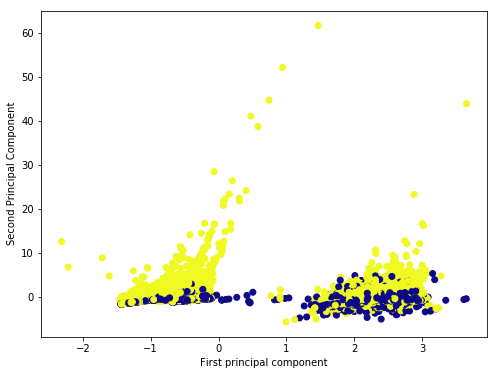

In [58]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [60]:
# Explore top two principal components
pca = PCA(n_components=2, random_state=101)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance_pca = pca.explained_variance_ratio_

Text(0,0.5,'Second Principal Component')

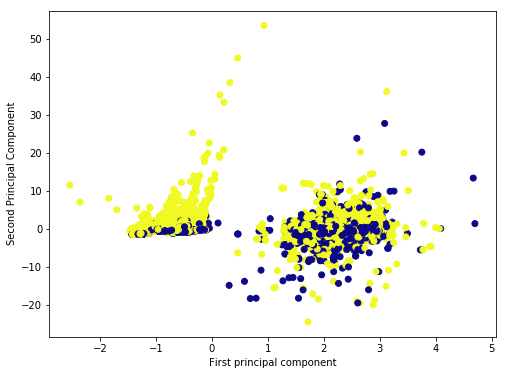

In [61]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [62]:
df_results

,model,time_fit,time_predict,time_10_fold_CV,accuracy,acc_10_fold
0,Naive Bayes,0.472809,0.183608,7.64459,0.621204,0.74582
1,Logistic Regression,20.989989,0.014490,205.522,0.837142,0.850865
2,K Nearest Neighbors,43.687085,931.513263,2974.55,0.909592,0.909695
3,SVM,2722.813777,553.268978,None,0.748346,None
4,Decision Tree,0.241746,0.024225,6.88338,0.999915,0.999991
5,Random Forest (10-fold),1.144031,0.086178,15.2351,0.999717,0.999859


In [63]:
#-----------------------------------------
# FIT MODEL (NAIVE BAYES)

start_clock = time.clock()

# Naive-Bayes
classifier_pca2_nb = GaussianNB()
classifier_pca2_nb.fit(X_train_pca, y_train)

end_clock = time.clock()

clock_fit_pca2_nb = end_clock - start_clock
print('Runtime, fit: ', round(clock_fit_pca2_nb, 2), ' sec', sep='')

end_clock = time.clock()

Runtime, fit: 0.02 sec


In [64]:
#-----------------------------------------
# PREDICT TEST RESULTS

start_clock = time.clock()

y_pred_pca2_nb = classifier_pca2_nb.predict(X_test_pca)

end_clock = time.clock()

clock_predict_pca2_nb = end_clock - start_clock
print('Runtime, predict: ', round(clock_predict_pca2_nb, 2), ' sec', sep='')

Runtime, predict: 0.0 sec


In [65]:
#-----------------------------------------
# EVALUATE MODEL

# Confusion matrix
cm_pca2_nb = confusion_matrix(y_test, y_pred_pca2_nb)

# Classification report
cr_pca2_nb = classification_report(y_test, y_pred_pca2_nb)

print(cm_pca2_nb)
print("\n")
print(cr_pca2_nb)

[[ 7045  7953]
 [ 5351 15013]]


             precision    recall  f1-score   support

          0       0.57      0.47      0.51     14998
          1       0.65      0.74      0.69     20364

avg / total       0.62      0.62      0.62     35362



In [67]:
acc_pca2_nb = cm_pca2_nb.diagonal().sum() / cm_pca2_nb.sum()
acc_pca2_nb

0.6237769356936825

In [68]:
#-----------------------------------------
# APPLY K-FOLD CROSS VALIDATION

start_clock = time.clock()

accuracies_pca2_nb = cross_val_score(
    estimator=classifier_pca2_nb, X=X_train_pca, y=y_train,
    cv=10)

end_clock = time.clock()

clock_10FCV_pca2_nb = end_clock - start_clock
print('Runtime, 10-fold CV: ', round(clock_10FCV_pca2_nb, 2), ' sec', sep='')

Runtime, 10-fold CV: 0.24 sec


In [71]:
try:
    clock_10FCV_pca2_nb
except:
    clock_10FCV_pca2_nb = None
    print("No 10-fold CV time to report")

In [72]:
try:
    accuracies_pca2_nb
except:
    accuracy_10FCV_mean_pca2_nb = None
    print("No K-fold CV accuracies to report")
else:
    accuracy_10FCV_mean_pca2_nb = accuracies_pca2_nb.mean()
    print("Accuracies:")
    print(accuracies_pca2_nb)
    print('\n')
    print("RESULTS:")
    print(f"  - Mean accuracy: {round(accuracies_pca2_nb.mean(), 2)*100}%")
    print(f"  - Accuracy std dev: {round(accuracies_pca2_nb.std(), 2)*100}%")

Accuracies:
[0.59883118 0.62088793 0.60260156 0.60043359 0.6039212  0.62239608
 0.62984259 0.62848793 0.60111247 0.59875554]


RESULTS:
  - Mean accuracy: 61.0%
  - Accuracy std dev: 1.0%


In [73]:
df_results_pca2_nb = pd.DataFrame([{
    'model':'PCA (n=2), Naive Bayes', 
    'time_fit':clock_fit_pca2_nb, 'time_predict':clock_predict_pca2_nb,
    'time_10_fold_CV':clock_10FCV_pca2_nb,
    'accuracy':acc_pca2_nb, 'acc_10_fold':accuracy_10FCV_mean_pca2_nb}])
df_results_pca2_nb = df_results_pca2_nb[['model','time_fit','time_predict','time_10_fold_CV','accuracy','acc_10_fold']]

In [74]:
df_results = pd.DataFrame.append(df_results, df_results_pca2_nb).reset_index(drop=True)

In [37]:
df_results

,model,time_fit,time_predict,time_10_fold_CV,accuracy,acc_10_fold
0,Naive Bayes,0.472809,0.183608,7.64459,0.621204,0.74582
1,Logistic Regression,20.989989,0.014490,205.522,0.837142,0.850865
2,K Nearest Neighbors,43.687085,931.513263,2974.55,0.909592,0.909695
3,"SVM, Linear",2015.378373,311.117223,None,0.937419,None
4,"SVM, Kernel RBF",2722.813777,553.268978,None,0.748346,None
5,Decision Tree,0.241746,0.024225,6.88338,0.999915,0.999991
6,Random Forest (10-fold),1.144031,0.086178,15.2351,0.999717,0.999859
7,"PCA (n=2), Naive Bayes",0.021810,0.004308,0.243693,0.623777,0.610727


In [17]:
#==============================================================================
#
# GRID SEARCH
#
#==============================================================================

In [ ]:
# ---- RANDOM FOREST ----

In [12]:
# FIT MODEL

classifier_rf_grid = RandomForestClassifier(random_state=101)

In [ ]:
RandomForestClassifier(random_state=101, criterion=)

\# ---- APPLY GRID SEARCH ----

Options include
* criterion
* n_estimators
* max_features
* max_depth
* min_samples_leaf
* min_samples_split

In [13]:
# Decide parameters to loop through
parameters = {
    'n_estimators':[1,10,100],
    'criterion': ['gini', 'entropy']
}

In [14]:
# Create grid search object
grid_search = GridSearchCV(estimator=classifier_rf_grid,
    param_grid=parameters, scoring="accuracy", cv=10,
    n_jobs=-1, verbose=10)

In [16]:
# Fit grid search object to training set

start_clock = time.clock()
grid_search = grid_search.fit(X_train, y_train)
end_clock = time.clock()

clock_grid_search1 = end_clock - start_clock

print('Runtime, grid search: ', round(clock_grid_search1, 2), ' sec', sep='')

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  52 out of  60 | elapsed:  2.0min remaining:   18.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.4min finished


Runtime, grid search: 156.09 sec


In [18]:
# Print results
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(f"Best accuracy: {round(best_accuracy, 2)*100}%")
print("\n")
print(f"Best parameters: {best_parameters}")

Best accuracy: 100.0%


Best parameters: {'criterion': 'gini', 'n_estimators': 100}
